Objective

The goal is to analyze the relationships between drugs, their side effects, and the medical conditions they treat, as well as to explore the ratings and reviews
associated with these drugs.

In [82]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
file_path='/content/drive/MyDrive/data_science/drugs_side_effects_drugs_com (1).csv'

In [84]:
#!pip install scispacy spacy
#!python -m spacy download en_core_web_sm




In [85]:
#!pip install --no-deps https://huggingface.co/allenai/scispacy_models/resolve/main/en_core_sci_sm-0.5.1.tar.gz


In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
import re
#import itertools
#import scispacy
#import spacy
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import chi2_contingency


In [87]:
df=pd.read_csv(file_path)

In [88]:
df.head()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [89]:
df.shape

(2931, 17)

In [90]:
df.describe()

,rating,no_of_reviews
count,1586.000000,1586.000000
mean,6.812926,75.064943
std,2.313044,184.900847
min,0.000000,1.000000
25%,5.600000,2.000000
50%,7.000000,12.000000
75%,8.500000,58.000000
max,10.000000,2934.000000


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2888 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   brand_names                    1718 non-null   object 
 6   activity                       2931 non-null   object 
 7   rx_otc                         2930 non-null   object 
 8   pregnancy_category             2702 non-null   object 
 9   csa                            2931 non-null   object 
 10  alcohol                        1377 non-null   object 
 11  related_drugs                  1462 non-null   object 
 12  medical_condition_description  2931 non-null   o

In [92]:
df.isnull().sum()

,0
drug_name,0
medical_condition,0
side_effects,124
generic_name,43
drug_classes,82
brand_names,1213
activity,0
rx_otc,1
pregnancy_category,229
csa,0


In [93]:
nulldata=['side_effects', 'generic_name',
       'drug_classes', 'brand_names', 'activity', 'rx_otc',
       'pregnancy_category', 'csa', 'alcohol', 'related_drugs',
       'medical_condition_description']

In [94]:
df[nulldata]=df[nulldata].fillna('unknown')

In [95]:
df.isnull().sum()

,0
drug_name,0
medical_condition,0
side_effects,0
generic_name,0
drug_classes,0
brand_names,0
activity,0
rx_otc,0
pregnancy_category,0
csa,0


In [96]:
df['rating'] = df.groupby('drug_classes')['rating'].transform(lambda x: x.fillna(x.mean())).fillna(-1).round(2)
df['no_of_reviews'] = df.groupby('drug_classes')['no_of_reviews'].transform(lambda x: x.fillna(x.mean())).fillna(-1).round(2)

In [97]:
df.isnull().sum()

,0
drug_name,0
medical_condition,0
side_effects,0
generic_name,0
drug_classes,0
brand_names,0
activity,0
rx_otc,0
pregnancy_category,0
csa,0


In [98]:
df['medical_condition'].value_counts()

,count
medical_condition,
Pain,264
Colds & Flu,245
Acne,238
Hypertension,177
Osteoarthritis,129
Hayfever,124
Eczema,122
AIDS/HIV,109
Diabetes (Type 2),104


In [99]:
df['drug_name'].value_counts().nlargest(10)

,count
drug_name,
triamcinolone,3
minoxidil,2
beclomethasone,2
cromolyn,2
acyclovir,2
erythromycin,2
mometasone,2
hydrocortisone,2
diclofenac,2


In [100]:
df['side_effects'].value_counts().nlargest(10)

,count
side_effects,
unknown,124
"hives ; difficult breathing; swelling of your face, lips, tongue, or throat. This medicine may cause serious side effects. Stop using this medicine and call your doctor at once if you have: redness or swelling of the treated area; increased pain; or severe burning or skin irritation such as a rash, itching, pain, or blistering. Less serious side effects may be more likely, and you may have none at all.",10
"hives ; difficult breathing; swelling of your face, lips, tongue, or throat. This medicine may cause serious side effects. Stop using this medicine and call your doctor at once if you have: bone pain, muscle weakness; confusion, changes in your mental state, seizure (convulsions); or pale skin, feeling light-headed or short of breath, rapid heart rate. Less serious side effects may be more likely, and you may have none at all.",8
"redness, warmth, swelling, itching, stinging, burning, or irritation of treated skin.",7
"hives ; difficult breathing; swelling of your face, lips, tongue, or throat. Less serious side effects may include: stinging; rash; or skin irritation.",5
"hives ; difficult breathing; swelling of your face, lips, tongue, or throat. Common side effects may include temporary hair loss (especially in children).",5
"hives ; difficulty breathing; swelling of your face, lips, tongue, or throat. This medicine may cause serious side effects. Stop using this medicine and call your doctor at once if you have: nervousness , dizziness , or sleeplessness ; chest pain, fast or uneven heart rate; little or no urinating; dangerously high blood pressure (severe headache , buzzing in your ears, anxiety , shortness of breath); if your symptoms do not improve after 7 days of treatment, or if you have a fever; or if new symptoms occur. Less serious side effects may be more likely, and you may have none at all.",5
"hives ; difficulty breathing; swelling of your face, lips, tongue, or throat. Less serious side effects may occur, and you may have none at all.",3
"hives ; difficult breathing; swelling of your face, lips, tongue, or throat.",3


In [101]:
#nlp = spacy.load("en_ner_bc5cdr_md")
#nlp = spacy.load("en_core_web_sm")
# Function to extract medical entities
#def extract_side_effects(text):
    #if pd.isnull(text):
        #return []
    #doc = nlp(str(text).lower())
    #return [ent.text.strip() for ent in doc.ents if ent.label_ == "DISEASE"]

# Extract side effects from text
#df['side_effect_list'] = df['side_effects'].apply(extract_side_effects)



Drug vs. Condition

In [102]:

df['cleaned_condition'] = df['medical_condition'].apply(lambda x: str(x).lower())
df['cleaned_drug'] = df['drug_name'].apply(lambda x: str(x).lower())

In [103]:
ct_drug_condition=pd.crosstab(df['cleaned_drug'],df['cleaned_condition'])

In [104]:
chi2_dc, p_dc, dof_dc, _ = chi2_contingency(ct_drug_condition)
print(f"Chi2 (Drug vs Condition): {chi2_dc:.2f}, p-value: {p_dc}")


Chi2 (Drug vs Condition): 134077.37, p-value: 0.36983079980311495


In [105]:
def cramers_v(ct):
    chi2 = chi2_contingency(ct)[0]
    n = ct.sum().sum()
    r, k = ct.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))
cv_dc = cramers_v(ct_drug_condition)
print(f"Cramér’s V (Drug vs Condition): {cv_dc:.4f}")

Cramér’s V (Drug vs Condition): 0.9972


Chi-Square result suggest there’s no statistically significant relationship between the drug and the medical condition.

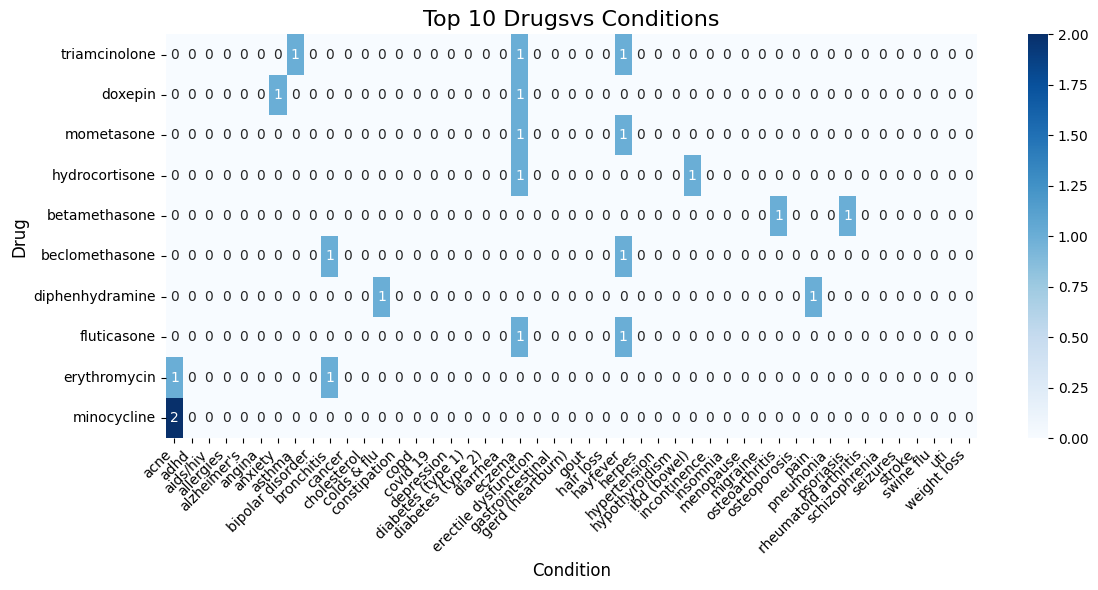

In [106]:

# Get top 10 drugs by total frequency
top_10_drugs = ct_drug_condition.sum(axis=1).sort_values(ascending=False).head(10).index

# Filter for top 10 drugs
ct_top10 = ct_drug_condition.loc[top_10_drugs]

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(ct_top10, cmap="Blues", annot = True,fmt="d")
plt.title("Top 10 Drugsvs Conditions", fontsize=16)
plt.xlabel("Condition", fontsize=12)
plt.ylabel("Drug", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Drug vs. side effect

In [107]:
def clean_side_effects(text):
    if pd.isna(text):
        return []
    text = text.lower()
    text = re.sub(r"[;.:]", "|", text)
    text = text.replace(" or ", ", ").replace(" and ", ", ")
    text = re.sub(r"\s*\|\s*", "|", text)
    return [s.strip() for s in re.split(r'[|,]', text) if s.strip()]


# --- Apply the side effect cleaning function ---
df['side_effect_list'] = df['side_effects'].apply(clean_side_effects)

# --- Explode the list to individual side effects per row ---
df_exploded = df.explode('side_effect_list')

# --- Normalize again to ensure consistency ---
df_exploded['side_effect_list'] = df_exploded['side_effect_list'].astype(str).str.lower().str.strip()

# --- Define a valid side effect using regex ---
valid_pattern = re.compile(r"^[a-z][a-z\s\-']{1,49}$")

# --- Filter valid and invalid side effects ---
is_valid = df_exploded['side_effect_list'].apply(lambda x: bool(valid_pattern.fullmatch(x)))
valid_df = df_exploded[is_valid]
invalid_df = df_exploded[~is_valid]

# Group only valid side effects
ct_drug_side=pd.crosstab(valid_df ['cleaned_drug'],valid_df ['side_effect_list'])



In [108]:
chi2_dc, p_dc, dof_dc, _ = chi2_contingency(ct_drug_side)
print(f"Chi2 (Drug vs side_effect): {chi2_dc:.2f}, p-value: {p_dc}")

Chi2 (Drug vs side_effect): 30036868.66, p-value: 5.148640730977826e-122


There is an extremely strong and statistically significant association between the drug and its reported side effects.

/tmp/ipython-input-2208698503.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Side Effect', data=top_10_side_df, palette='viridis')


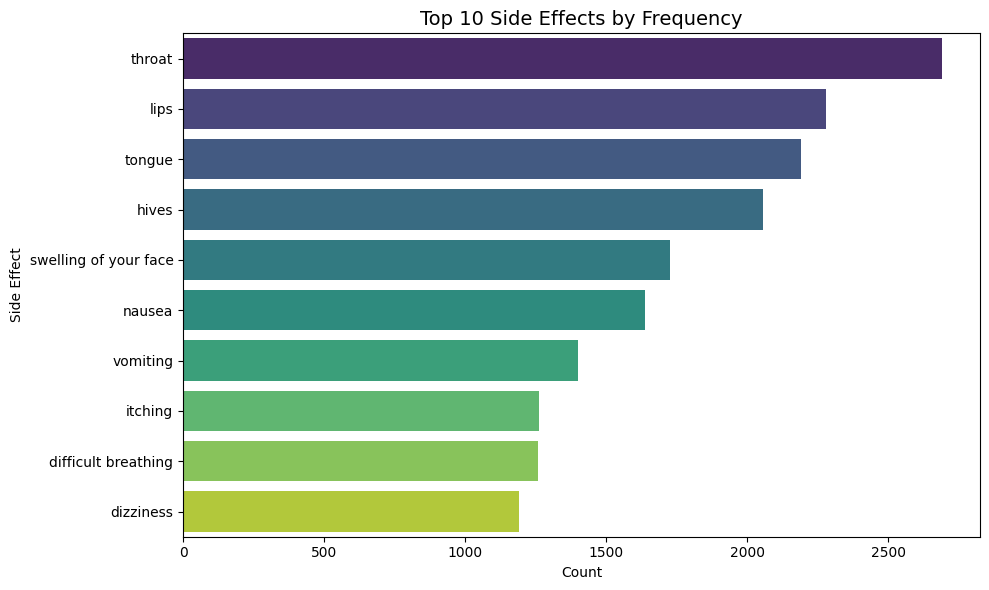

In [109]:
# Get top 10 side effects by total frequency
top_10_side = (
    ct_drug_side
    .sum(axis=0)
    .drop(labels=[col for col in ct_drug_side.columns
                  if "call your doctor at once if you have" in col.lower()])
    .sort_values(ascending=False)
    .head(10)
)


# Convert to DataFrame for plotting
top_10_side_df = top_10_side.reset_index()
top_10_side_df.columns = ['Side Effect', 'Count']

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Side Effect', data=top_10_side_df, palette='viridis')
plt.title('Top 10 Side Effects by Frequency', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Side Effect')
plt.tight_layout()
plt.show()



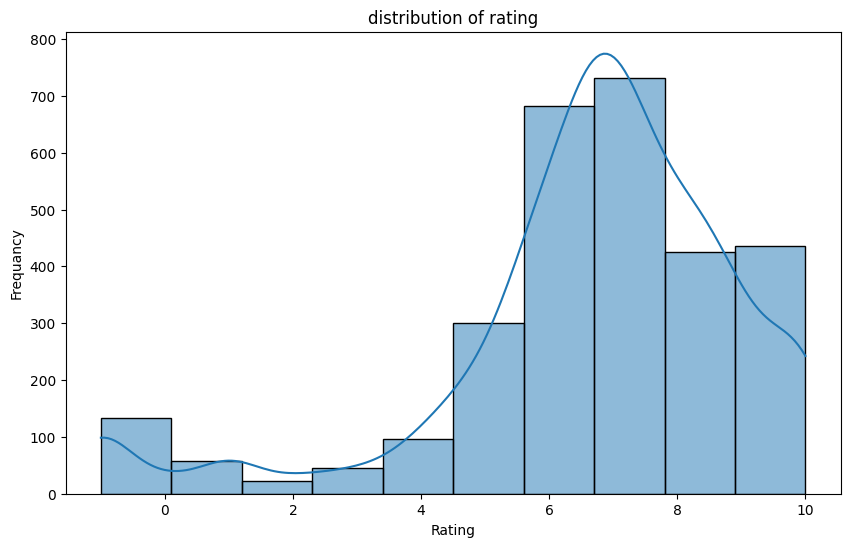

In [110]:
plt.figure(figsize=(10,6))
sns.histplot(df['rating'],kde=True,bins=10)
plt.title('distribution of rating')
plt.xlabel('Rating')
plt.ylabel('Frequancy')
plt.savefig('histplot')
plt.show()

The distribution of drug ratings is positively right skewed, indicating that most users reported high satisfaction (ratings 6–10), while lower or zero ratings may reflect user dissatisfaction or imputed values from missing data handling.

/tmp/ipython-input-2474720282.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='no_of_reviews', y='drug_name', data=top_review_drugs, palette='viridis')


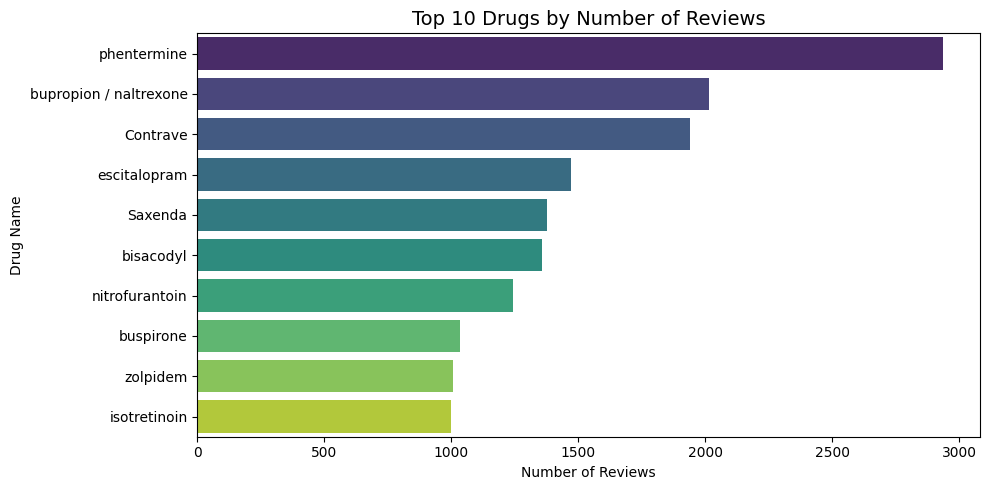

In [111]:
top_review_drugs = (
    df.groupby('drug_name')['no_of_reviews']
    .sum()
    .nlargest(10)
    .reset_index()
)

plt.figure(figsize=(10, 5))
sns.barplot(x='no_of_reviews', y='drug_name', data=top_review_drugs, palette='viridis')
plt.title('Top 10 Drugs by Number of Reviews', fontsize=14)
plt.xlabel('Number of Reviews')
plt.ylabel('Drug Name')
plt.tight_layout()
plt.show()


In [112]:
drug_data=df.groupby('drug_name')['medical_condition'].value_counts().nlargest(10)
drug_data

,,count
drug_name,medical_condition,
acyclovir,Herpes,2
fluocinolone,Eczema,2
minocycline,Acne,2
7T Gummy ES Chewable Tablets,Pain,1
A-G Profen,Osteoarthritis,1
A-Phedrin,Colds & Flu,1
Abatuss DMX,Colds & Flu,1
Abenol,Pain,1
Abilify,Bipolar Disorder,1


 analysis shows that Acyclovir–Herpes, Fluocinolone–Eczema, and Minocycline–Acne are the most frequent drug–condition pairs, while others occur only once, indicating niche or limited usage in the dataset.

In [113]:
df['medical_condition'].value_counts().nlargest(10)

,count
medical_condition,
Pain,264
Colds & Flu,245
Acne,238
Hypertension,177
Osteoarthritis,129
Hayfever,124
Eczema,122
AIDS/HIV,109
Diabetes (Type 2),104


In [114]:
count_drugclass=df['drug_classes'].value_counts()

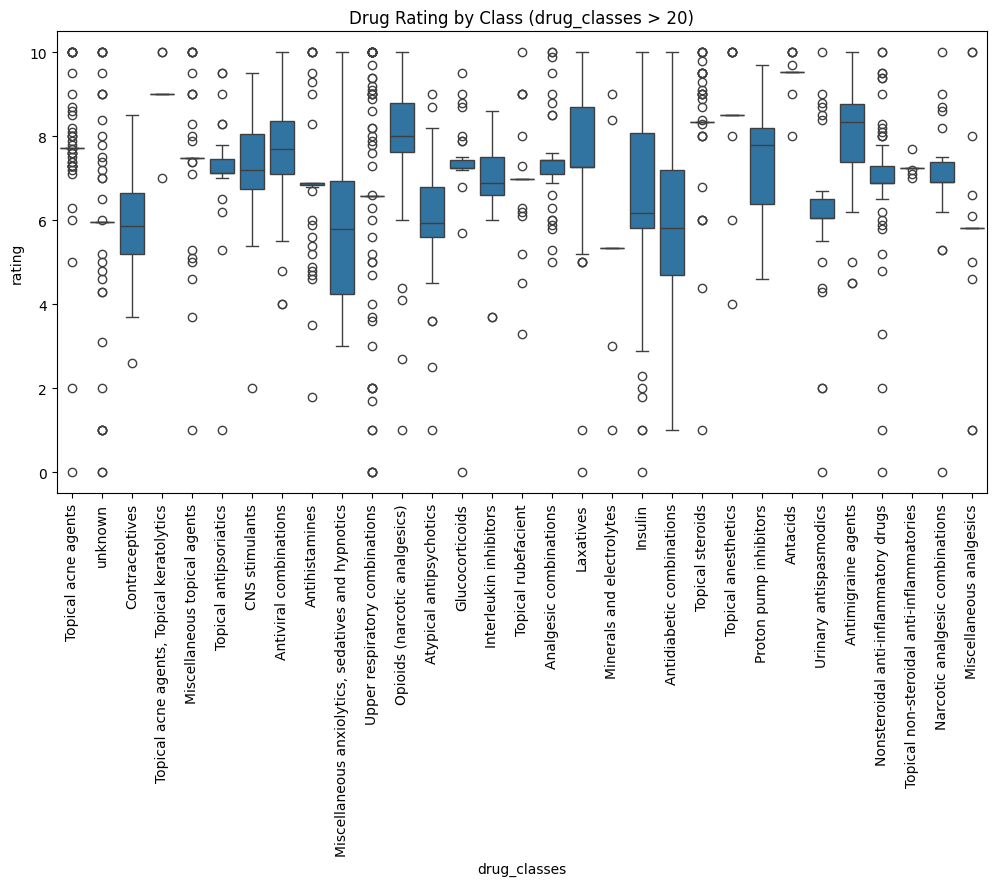

In [115]:
count_drugclass=count_drugclass[count_drugclass>20].index

drugclass = df[df['drug_classes'].isin(count_drugclass)]

plt.figure(figsize=(12,6))
sns.boxplot(x='drug_classes', y='rating', data=drugclass)
plt.title('Drug Rating by Class (drug_classes > 20)')
plt.xticks(rotation=90)
plt.savefig('boxplot')
plt.show()

The boxplot shows that most drug classes have median user ratings between 6 and 8, indicating generally favorable satisfaction. Classes like interleukin inhibitors, antacids, and some analgesics have high and consistent ratings, while classes like urinary antispasmodics, laxatives, and mineral supplements show lower medians and wider variability, suggesting mixed effectiveness or tolerance. Outliers in almost every category reflect individual differences in user response.

In [116]:
df['drug_name'].value_counts().nlargest(10)

,count
drug_name,
triamcinolone,3
minoxidil,2
beclomethasone,2
cromolyn,2
acyclovir,2
erythromycin,2
mometasone,2
hydrocortisone,2
diclofenac,2
